<a id="top"></a> 
# Appendix: Multiplication and Convolution in Different Domains

We stated in this module the important fact that multiplication in the time domain is equivalent to convolution in the frequency domain. Mathematically, we may express this relation as,

$$
FT[xw] = FT[x]\star FT[w] \, ,
\tag{1}
$$

where $x$ and $w$ are two time series, $FT[x]$ is the Fourier transform of $x$, and $X \star Y$ indicates the convolution of $X$ and $Y$, 

$$X \star Y[\beta] = \int_{-\infty}^{\infty}X[b]Y[\beta - b]db.$$

The convolution of two functions (with arguments $b$ in this formula) is itself a function of the same argument (with symbol $\beta$ in this formula). Equation (1) states that the Fourier transform of the element-by-element product of $x$ and $w$ equals the convolution of the Fourier transform of $x$ and the Fourier transform of $w$. We consider here an equivalent, alternative statement: that convolution in the time domain is equivalent to multiplication in the frequency domain. Mathematically,

$$
FT[x \star w] = FT[x]FT[w].
$$

This equation states that the Fourier transform of the convolution of $x$ and $w$ equals the product of the Fourier transform of $x$ and the Fourier transform of $w$. To prove this relation, let’s consider the Fourier transform of the convolution of $x$ and $w$. We use the following expression for the continuous-time Fourier transform,

$$
FT(x \star w[\tau]) = \int_{-\infty}^{\infty}\big(x\star w[\tau]\big)e^{-2 \pi i f \tau}d\tau,
$$

where the notation $[\tau]$ indicates that the convolution $(x\star w)$ is a function of time $\tau$. Now, let's substitute the definition of convolution into this expression and simiplify using an introduction of a second exponential expression,

$$
\begin{align}
FT(x \star w[\tau]) = & 
\int_{-\infty}^{\infty}
\bigg( \int_{-\infty}^\infty x[t]w[\tau-t]dt \bigg)
e^{-2\pi i f \tau} 
d\tau \\
%
= & \int_{-\infty}^{\infty} 
\int_{-\infty}^\infty 
x[t]w[\tau-t]dt\ 
e^{-2\pi i f (\tau - t)} 
e^{-2\pi i f t} 
d\tau \\
%
= & \int_{-\infty}^{\infty} \int_{-\infty}^\infty 
\big( x[t] e^{-2\pi i f t} \big)
\big( w[\tau - t] e^{-2\pi i f (\tau - t)}\big)
dt\ d\tau.\\
\end{align}
$$

Setting $T \equiv \tau - t$, we find

$$
\begin{align}
FT(x \star w[\tau]) = & 
\int_{-\infty}^{\infty} \int_{-\infty}^\infty 
\big( x[t] e^{-2\pi i f t} dt \big)
\big( w[T] e^{-2\pi i f (T)} dT \big) \\
%
= & \bigg( \int_{-\infty}^{\infty}x[t] e^{-2\pi i f t} dt \bigg)
\bigg(\int_{-\infty}^{\infty} w[T] e^{-2\pi i f (T)} dT \bigg) \\
%
= & FT[x]FT[w]
%
\end{align}
$$

and therefore conclude that the Fourier transform of the convolution of $x$ and $w$ equals the element-by-element product of their Fourier transforms.

We may compute a simple example to illustrate this relation:

In [1]:
# Import numpy and matplotlib packages
import numpy as np
import matplotlib.pyplot as plt

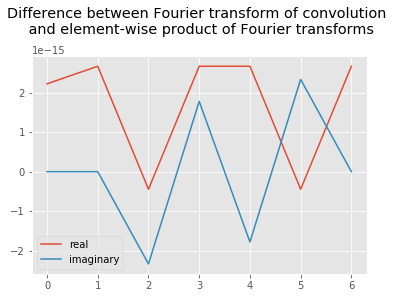

In [2]:
x = np.array([ 3,   4,    5, 6])               # Define a simple signal x,
w = np.array([-1, 0.1, -0.2, 1])               # ... and another simple signal w.
a = np.fft.fft(np.convolve(w, x))              # Take the Fourier transform of the convolution,
b = np.fft.fft(np.hstack([w, [0, 0, 0]])) * \
    np.fft.fft(np.hstack([x, [0, 0, 0]]))      # ... and the product of the Fourier transforms.
    
plt.plot(a.real - b.real, label='real')        # Plot the difference
plt.plot(a.imag - b.imag, label='imaginary')
plt.legend()
plt.title('Difference between Fourier transform of convolution \n and element-wise product of Fourier transforms\n')
plt.show()

In the first two lines, we define two simple signals; each consists of only four elements, which is enough to illustrate the relation. In the third line, we first compute the convolution of $w$ and $x$, and then the Fourier transform. In the fourth and fifth lines, we compute the Fourier transform of each variable, and then their element-by-element product. Notice that we zero-pad both variables before computing their Fourier transforms. We do so to avoid computing circular correlations between the variables (i.e., wrapping around one variable when comparing it to another). Also, we make the lengths of variables $a$ and $b$ the same. Evaluating the statement, we find the difference between $a$ and $b$ to be on the order of $10^{-15}$, which is very close to zero.